In [1]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.models.rnn import rnn, rnn_cell
import numpy as np
import numpy.random as rng

In [3]:
import pandas.io.data as web
from pykalman import KalmanFilter
import numpy as np
import pandas as pd

In [4]:
def get_prices(symbol):
    start, end = '2007-05-02', '2016-04-11'
    data = web.DataReader(symbol, 'yahoo', start, end)
    data=pd.DataFrame(data)
    prices=data['Adj Close']
    #prices=np.asarray(list(prices))
    prices=prices.astype(float)
    return prices

In [5]:
gs = get_prices('GS')

In [6]:
c = get_prices('C')

In [7]:
def get_returns(prices):
    return (prices-prices.shift(-1))/prices

In [8]:
rets = get_returns(gs)

In [9]:
rets_c = get_returns(c)

In [10]:
def sort_data(rets, N):
    ins = []
    outs = []
    for i in range(N):
        xx = np.random.randint(len(rets)-100)
        ins.append(rets[xx:xx+100].tolist())
        outs.append(rets[xx+100])
    return np.array(ins), np.array(outs)

In [11]:
rets.shape

(2252,)

In [12]:
ins, outs = sort_data(rets, 1000)


In [13]:
ins_c, outs_c = sort_data(rets_c, 1000)

In [14]:
arr = np.array([ins.T, ins_c.T])

In [15]:
arr = arr.T

In [16]:
arr.shape

(1000, 100, 2)

In [17]:
ar_out = np.array([outs, outs_c])

In [19]:
ar_out = ar_out.T

In [20]:
arr.shape

(1000, 100, 2)

In [21]:
ar_out.shape

(1000, 2)

#TensorFlow 1

In [22]:
sess = tf.InteractiveSession()

In [23]:
x = tf.placeholder(tf.float32, [None, 200])
y_ = tf.placeholder(tf.float32, [None, 2])

In [24]:
W = tf.Variable(tf.random_normal([200, 2]))
b = tf.Variable(tf.random_normal([2]))

In [25]:
y = tf.matmul(x, W) + b

In [26]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [27]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

In [28]:
init = tf.initialize_all_variables()

In [29]:
sess = tf.Session()
sess.run(init)

In [31]:
for epoch in range(2000):
    #batch_xs, batch_ys = mnist.train.next_batch(100)
    feed_dict={x: arr.reshape(1000, 200), y_: ar_out}#.reshape(1,-1).T}
    sess.run(optimizer, feed_dict=feed_dict)#outs.reshape(1,-1).T})
    if (epoch+1)%100== 0:
        c = sess.run(cost, feed_dict=feed_dict)
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            )

Epoch: 0100 cost= 0.192590281
Epoch: 0200 cost= 0.154720932
Epoch: 0300 cost= 0.127381220
Epoch: 0400 cost= 0.107035682
Epoch: 0500 cost= 0.091481544
Epoch: 0600 cost= 0.079305835
Epoch: 0700 cost= 0.069577396
Epoch: 0800 cost= 0.061664838
Epoch: 0900 cost= 0.055128902
Epoch: 1000 cost= 0.049657114
Epoch: 1100 cost= 0.045021817
Epoch: 1200 cost= 0.041054219
Epoch: 1300 cost= 0.037626509
Epoch: 1400 cost= 0.034640692
Epoch: 1500 cost= 0.032020405
Epoch: 1600 cost= 0.029705372
Epoch: 1700 cost= 0.027647637
Epoch: 1800 cost= 0.025808390
Epoch: 1900 cost= 0.024156103
Epoch: 2000 cost= 0.022664903


In [32]:
predict = y

In [33]:
p = sess.run(predict, feed_dict=feed_dict)

In [34]:
sess.run(W)

array([[ 0.38114092,  0.13199468],
       [-0.12364696,  0.26719409],
       [-0.28212741, -0.61729842],
       [-0.31149265, -0.48263323],
       [ 0.05624521,  0.56310397],
       [-0.6521557 ,  0.06043724],
       [-0.79150641, -0.7629084 ],
       [-0.26433766, -0.2428785 ],
       [ 0.57532781, -0.02395909],
       [-0.12469169,  0.23810336],
       [ 0.05122634,  0.52980632],
       [ 0.28822219, -0.11060995],
       [-0.46512109, -0.42281139],
       [-0.0540933 ,  0.23907785],
       [-0.89169019,  0.4351888 ],
       [-0.77155715, -0.07623435],
       [ 0.28079161,  0.97392821],
       [ 0.37495756, -0.01177794],
       [-0.25884354,  0.06063631],
       [-0.13436271, -0.16902484],
       [-0.03201395,  0.60672247],
       [ 0.56236845, -0.76137269],
       [-2.10535622, -0.18897073],
       [-0.06276677,  0.7693907 ],
       [ 0.70923114,  0.57507265],
       [ 0.54711825, -0.14913201],
       [ 0.48089594,  0.03855405],
       [ 0.28273609,  0.05012471],
       [ 0.16550493,

In [39]:
p.shape

(1000, 2)

In [38]:
outs.shape

(1000,)

/Users/liamconnell/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


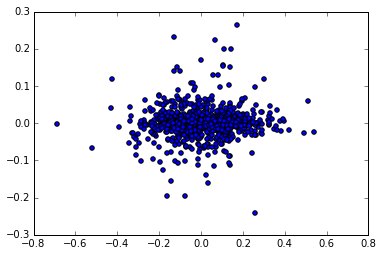

In [43]:
plt.scatter(p.T[1],ar_out.T[1])

In [33]:
new_ins, new_outs = sort_data(rets, 1000)

In [34]:
p = sess.run(predict, feed_dict={x: new_ins})

ValueError: Cannot feed value of shape (1000, 100) for Tensor 'Placeholder:0', which has shape (Dimension(None), Dimension(200))

In [ ]:
plot(p,new_outs)

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(p,new_outs)

In [ ]:
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(p) - new_outs) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(p, new_outs))